# Data Science - Alex Paulo
### Unsupervised Learning
### Dataset from https://archive.ics.uci.edu/ml/datasets/iris

### Iris Dataset

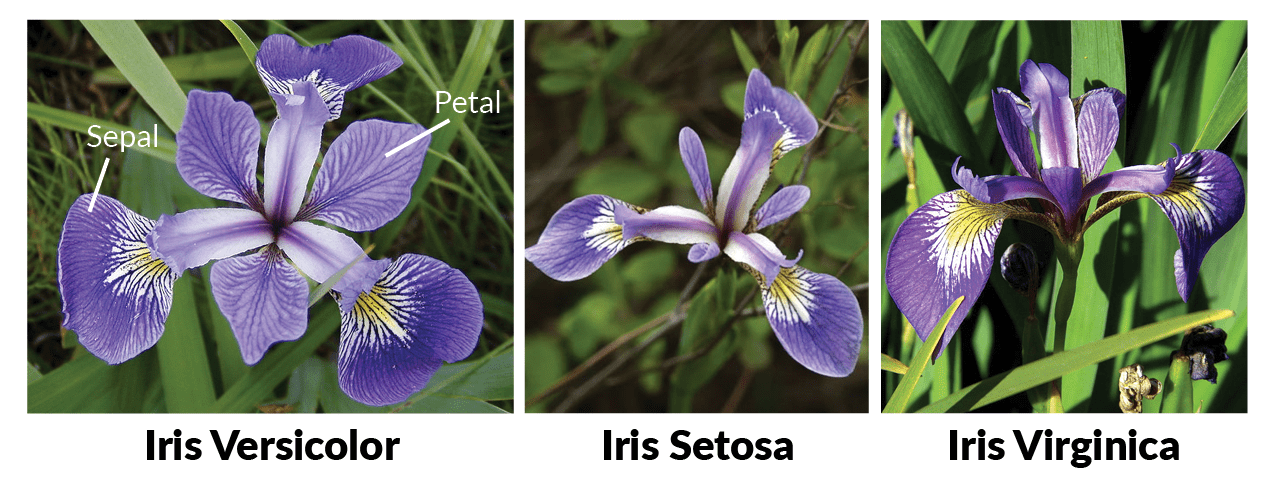

In [131]:
from IPython.display import display, Image

display(Image(filename='./IrisDataset.png'))


### O que é Unsupervised Learning?

Abordagem para encontrar padrões quando não dispomos de rótulos.

### Exercício

##### 1) Importe os dados da base gratuita existente em https://archive.ics.uci.edu/ml/datasets/iris. Ou, utilize uma abordagem para dispor desses dados utilizando a API documentada no portal https://scikit-learn.org

##### 2) Carregue os dados da base em um DataFrame e faça uma análise exploratória.

##### 3) Faça a codificação da coluna de categorização utilizando a classe LabelEncoder do pacote sklearn.preprocessing.

##### 4) Utilize a classe KMeans, disponível no pacote klearn.cluster, informando que a quantidade de clusters é igual a três (Iris-setosa, Iris-versicolor e Iris-virginica), para realizar o treinamento não supervisionado.

##### 5) Após a conclusão do mapeamento, exiba o resultado numérico da predição.

##### 6) Monte um gráfico de dispersão considerando SepalLengthCm no eixo das abscissas, e PetalLengthCm no eixo das ordenadas. Esse gráfico deve considerar o resultado da predição realizada na questão anterior objetivando dar cores diferentes a cada ponto do gráfico.


### Define dabase on Code

In [132]:
import pandas as pd
from io import StringIO

iris_database_on_source_code = """
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa
11,5.4,3.7,1.5,0.2,Iris-setosa
12,4.8,3.4,1.6,0.2,Iris-setosa
13,4.8,3.0,1.4,0.1,Iris-setosa
14,4.3,3.0,1.1,0.1,Iris-setosa
15,5.8,4.0,1.2,0.2,Iris-setosa
16,5.7,4.4,1.5,0.4,Iris-setosa
17,5.4,3.9,1.3,0.4,Iris-setosa
18,5.1,3.5,1.4,0.3,Iris-setosa
19,5.7,3.8,1.7,0.3,Iris-setosa
20,5.1,3.8,1.5,0.3,Iris-setosa
21,5.4,3.4,1.7,0.2,Iris-setosa
22,5.1,3.7,1.5,0.4,Iris-setosa
23,4.6,3.6,1.0,0.2,Iris-setosa
24,5.1,3.3,1.7,0.5,Iris-setosa
25,4.8,3.4,1.9,0.2,Iris-setosa
26,5.0,3.0,1.6,0.2,Iris-setosa
27,5.0,3.4,1.6,0.4,Iris-setosa
28,5.2,3.5,1.5,0.2,Iris-setosa
29,5.2,3.4,1.4,0.2,Iris-setosa
30,4.7,3.2,1.6,0.2,Iris-setosa
31,4.8,3.1,1.6,0.2,Iris-setosa
32,5.4,3.4,1.5,0.4,Iris-setosa
33,5.2,4.1,1.5,0.1,Iris-setosa
34,5.5,4.2,1.4,0.2,Iris-setosa
35,4.9,3.1,1.5,0.1,Iris-setosa
36,5.0,3.2,1.2,0.2,Iris-setosa
37,5.5,3.5,1.3,0.2,Iris-setosa
38,4.9,3.1,1.5,0.1,Iris-setosa
39,4.4,3.0,1.3,0.2,Iris-setosa
40,5.1,3.4,1.5,0.2,Iris-setosa
41,5.0,3.5,1.3,0.3,Iris-setosa
42,4.5,2.3,1.3,0.3,Iris-setosa
43,4.4,3.2,1.3,0.2,Iris-setosa
44,5.0,3.5,1.6,0.6,Iris-setosa
45,5.1,3.8,1.9,0.4,Iris-setosa
46,4.8,3.0,1.4,0.3,Iris-setosa
47,5.1,3.8,1.6,0.2,Iris-setosa
48,4.6,3.2,1.4,0.2,Iris-setosa
49,5.3,3.7,1.5,0.2,Iris-setosa
50,5.0,3.3,1.4,0.2,Iris-setosa
51,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4.0,1.3,Iris-versicolor
55,6.5,2.8,4.6,1.5,Iris-versicolor
56,5.7,2.8,4.5,1.3,Iris-versicolor
57,6.3,3.3,4.7,1.6,Iris-versicolor
58,4.9,2.4,3.3,1.0,Iris-versicolor
59,6.6,2.9,4.6,1.3,Iris-versicolor
60,5.2,2.7,3.9,1.4,Iris-versicolor
61,5.0,2.0,3.5,1.0,Iris-versicolor
62,5.9,3.0,4.2,1.5,Iris-versicolor
63,6.0,2.2,4.0,1.0,Iris-versicolor
64,6.1,2.9,4.7,1.4,Iris-versicolor
65,5.6,2.9,3.6,1.3,Iris-versicolor
66,6.7,3.1,4.4,1.4,Iris-versicolor
67,5.6,3.0,4.5,1.5,Iris-versicolor
68,5.8,2.7,4.1,1.0,Iris-versicolor
69,6.2,2.2,4.5,1.5,Iris-versicolor
70,5.6,2.5,3.9,1.1,Iris-versicolor
71,5.9,3.2,4.8,1.8,Iris-versicolor
72,6.1,2.8,4.0,1.3,Iris-versicolor
73,6.3,2.5,4.9,1.5,Iris-versicolor
74,6.1,2.8,4.7,1.2,Iris-versicolor
75,6.4,2.9,4.3,1.3,Iris-versicolor
76,6.6,3.0,4.4,1.4,Iris-versicolor
77,6.8,2.8,4.8,1.4,Iris-versicolor
78,6.7,3.0,5.0,1.7,Iris-versicolor
79,6.0,2.9,4.5,1.5,Iris-versicolor
80,5.7,2.6,3.5,1.0,Iris-versicolor
81,5.5,2.4,3.8,1.1,Iris-versicolor
82,5.5,2.4,3.7,1.0,Iris-versicolor
83,5.8,2.7,3.9,1.2,Iris-versicolor
84,6.0,2.7,5.1,1.6,Iris-versicolor
85,5.4,3.0,4.5,1.5,Iris-versicolor
86,6.0,3.4,4.5,1.6,Iris-versicolor
87,6.7,3.1,4.7,1.5,Iris-versicolor
88,6.3,2.3,4.4,1.3,Iris-versicolor
89,5.6,3.0,4.1,1.3,Iris-versicolor
90,5.5,2.5,4.0,1.3,Iris-versicolor
91,5.5,2.6,4.4,1.2,Iris-versicolor
92,6.1,3.0,4.6,1.4,Iris-versicolor
93,5.8,2.6,4.0,1.2,Iris-versicolor
94,5.0,2.3,3.3,1.0,Iris-versicolor
95,5.6,2.7,4.2,1.3,Iris-versicolor
96,5.7,3.0,4.2,1.2,Iris-versicolor
97,5.7,2.9,4.2,1.3,Iris-versicolor
98,6.2,2.9,4.3,1.3,Iris-versicolor
99,5.1,2.5,3.0,1.1,Iris-versicolor
100,5.7,2.8,4.1,1.3,Iris-versicolor
101,6.3,3.3,6.0,2.5,Iris-virginica
102,5.8,2.7,5.1,1.9,Iris-virginica
103,7.1,3.0,5.9,2.1,Iris-virginica
104,6.3,2.9,5.6,1.8,Iris-virginica
105,6.5,3.0,5.8,2.2,Iris-virginica
106,7.6,3.0,6.6,2.1,Iris-virginica
107,4.9,2.5,4.5,1.7,Iris-virginica
108,7.3,2.9,6.3,1.8,Iris-virginica
109,6.7,2.5,5.8,1.8,Iris-virginica
110,7.2,3.6,6.1,2.5,Iris-virginica
111,6.5,3.2,5.1,2.0,Iris-virginica
112,6.4,2.7,5.3,1.9,Iris-virginica
113,6.8,3.0,5.5,2.1,Iris-virginica
114,5.7,2.5,5.0,2.0,Iris-virginica
115,5.8,2.8,5.1,2.4,Iris-virginica
116,6.4,3.2,5.3,2.3,Iris-virginica
117,6.5,3.0,5.5,1.8,Iris-virginica
118,7.7,3.8,6.7,2.2,Iris-virginica
119,7.7,2.6,6.9,2.3,Iris-virginica
120,6.0,2.2,5.0,1.5,Iris-virginica
121,6.9,3.2,5.7,2.3,Iris-virginica
122,5.6,2.8,4.9,2.0,Iris-virginica
123,7.7,2.8,6.7,2.0,Iris-virginica
124,6.3,2.7,4.9,1.8,Iris-virginica
125,6.7,3.3,5.7,2.1,Iris-virginica
126,7.2,3.2,6.0,1.8,Iris-virginica
127,6.2,2.8,4.8,1.8,Iris-virginica
128,6.1,3.0,4.9,1.8,Iris-virginica
129,6.4,2.8,5.6,2.1,Iris-virginica
130,7.2,3.0,5.8,1.6,Iris-virginica
131,7.4,2.8,6.1,1.9,Iris-virginica
132,7.9,3.8,6.4,2.0,Iris-virginica
133,6.4,2.8,5.6,2.2,Iris-virginica
134,6.3,2.8,5.1,1.5,Iris-virginica
135,6.1,2.6,5.6,1.4,Iris-virginica
136,7.7,3.0,6.1,2.3,Iris-virginica
137,6.3,3.4,5.6,2.4,Iris-virginica
138,6.4,3.1,5.5,1.8,Iris-virginica
139,6.0,3.0,4.8,1.8,Iris-virginica
140,6.9,3.1,5.4,2.1,Iris-virginica
141,6.7,3.1,5.6,2.4,Iris-virginica
142,6.9,3.1,5.1,2.3,Iris-virginica
143,5.8,2.7,5.1,1.9,Iris-virginica
144,6.8,3.2,5.9,2.3,Iris-virginica
145,6.7,3.3,5.7,2.5,Iris-virginica
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica
"""

# adjust iris_database_on_source_code as csv file
iris_database_on_source_code = iris_database_on_source_code.strip()
data = pd.read_csv(StringIO(iris_database_on_source_code), sep=',')

# Print the first 10 instances
data.head(10).style



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,2,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,3,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5,5.000000,3.600000,1.400000,0.200000,Iris-setosa
5,6,5.400000,3.900000,1.700000,0.400000,Iris-setosa
6,7,4.600000,3.400000,1.400000,0.300000,Iris-setosa
7,8,5.000000,3.400000,1.500000,0.200000,Iris-setosa
8,9,4.400000,2.900000,1.400000,0.200000,Iris-setosa
9,10,4.900000,3.100000,1.500000,0.100000,Iris-setosa


### EAD (Exploratory Analisys of Data)


In [133]:
# Information on the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [134]:
data.shape

(150, 6)

In [135]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


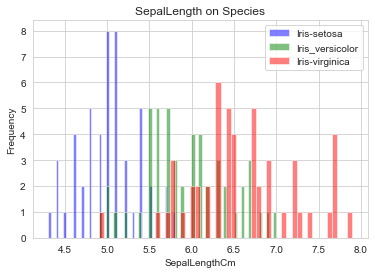

In [136]:
import matplotlib.pyplot as plt 

# Plot a histogram of SepalLength Frequency on Species (matplotlib)
Iris_setosa = data[data["Species"] == "Iris-setosa"]
Iris_versicolor = data[data["Species"] == "Iris-versicolor"]
Iris_virginica = data[data["Species"] == "Iris-virginica"]

Iris_setosa["SepalLengthCm"].plot.hist(alpha=0.5,color='blue',bins=50) # Setting the opacity(alpha value) & setting the bar width((bins value)
Iris_versicolor["SepalLengthCm"].plot.hist(alpha=0.5,color='green',bins=50)
Iris_virginica["SepalLengthCm"].plot.hist(alpha=0.5,color='red',bins=50)
plt.legend(['Iris-setosa','Iris_versicolor','Iris-virginica'])
plt.xlabel('SepalLengthCm')
plt.ylabel('Frequency')
plt.title('SepalLength on Species')
plt.show()

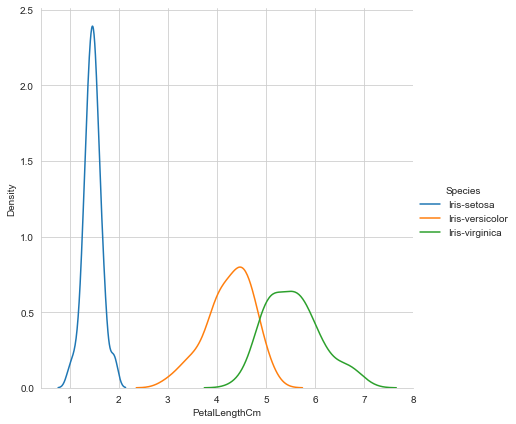

In [137]:
import seaborn as sns 
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Species", height=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

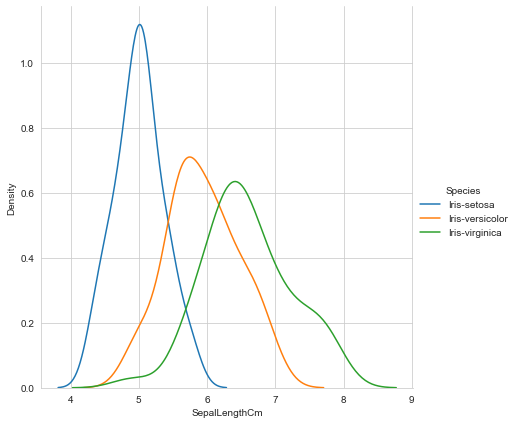

In [138]:
import seaborn as sns 
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Species", height=6) \
   .map(sns.kdeplot, "SepalLengthCm") \
   .add_legend()

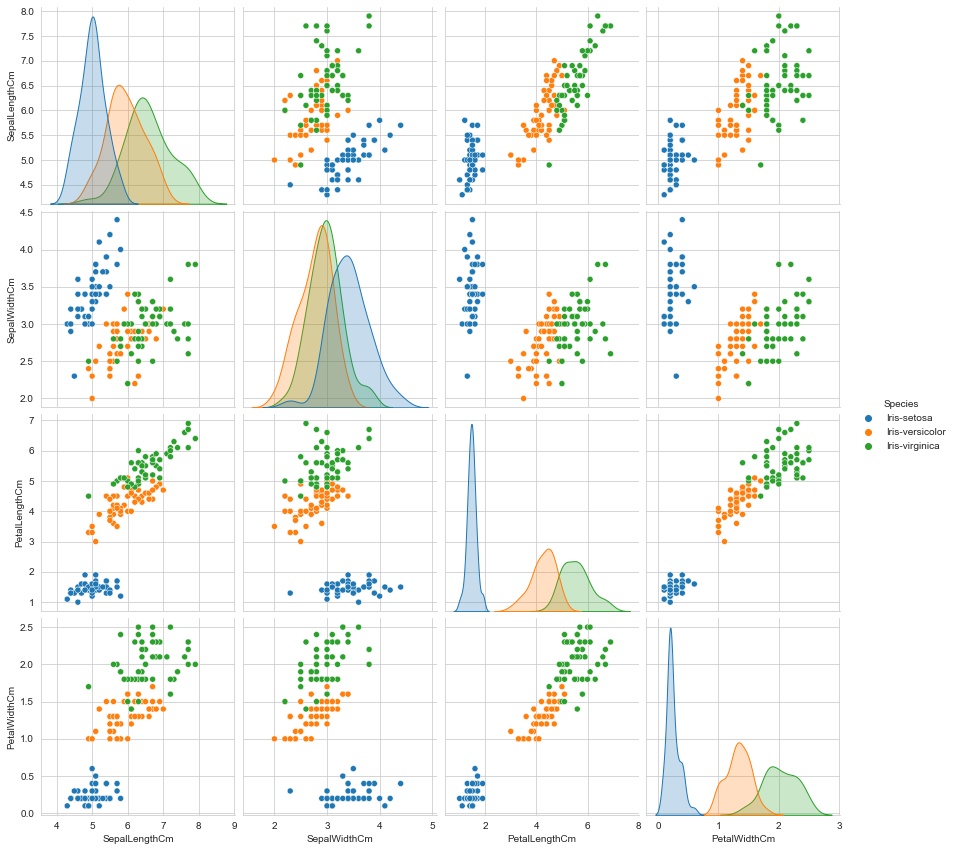

In [139]:
sns.pairplot(data.drop("Id", axis=1), hue="Species", height=3, diag_kind="kde")

<AxesSubplot:>

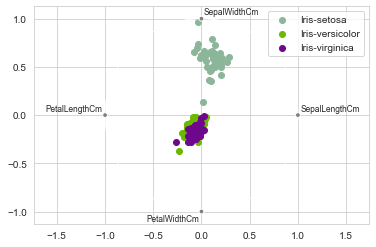

In [140]:
from pandas.plotting import radviz
radviz(data.drop("Id", axis=1), "Species")

### Data Preprocessing: Encoding Categorical Variables (Categorical To Numerical)

In [141]:
# Replace Iris-setosa with 0, Iris-versicolor:1 and Iris-virginica:2 
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data["Species"] = labelencoder.fit_transform(data["Species"])
# data["Species"]
# Construct a dataframe from a dictionary
species = pd.DataFrame({'Species': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']})
species

,Species
0,Iris-setosa
1,Iris-versicolor
2,Iris-virginica


### Learning

In [142]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(data)

labels = model.predict(data)

print(labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


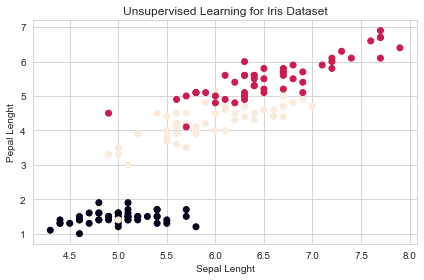

In [143]:
import matplotlib.pyplot as plt

x = data.iloc[:,1].values # SepalLengthCm
y = data.iloc[:,3].values # PepalLengthCm

plt.scatter(x, y, c=labels)
plt.title("Unsupervised Learning for Iris Dataset")
plt.xlabel("Sepal Lenght")
plt.ylabel("Pepal Lenght")
plt.tight_layout()

plt.show()
